# 📊 V4 vs V5.2 핵심 파생 변수 패턴 분석

이 노트북은 전처리 과정에서 생성된 핵심 파생 변수들의 분포와 이탈(Churn)과의 관계를 분석합니다.

## 분석 대상
1. **V4 (Payment Status)**: 결제 상태 관련 변수 (`days_since_last_payment`, `is_auto_renew_last` 등)
2. **V5.2 (Behavioral Signals)**: 행동 변화 관련 변수 (`active_decay_rate`, `skip_passion_index` 등)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 설정
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'AppleGothic' # Mac용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
DATA_PATH = Path('../data/processed/kkbox_train_feature_v4.parquet')
df = pd.read_parquet(DATA_PATH)

print(f"데이터 크기: {df.shape}")
print("Columns:", df.columns.tolist())

데이터 크기: (860966, 92)
Columns: ['msno', 'city', 'gender', 'registered_via', 'is_churn', 'num_days_active_w7', 'total_secs_w7', 'avg_secs_per_day_w7', 'std_secs_w7', 'num_songs_w7', 'avg_songs_per_day_w7', 'num_unq_w7', 'num_25_w7', 'num_100_w7', 'short_play_w7', 'skip_ratio_w7', 'completion_ratio_w7', 'short_play_ratio_w7', 'variety_ratio_w7', 'num_days_active_w14', 'total_secs_w14', 'avg_secs_per_day_w14', 'std_secs_w14', 'num_songs_w14', 'avg_songs_per_day_w14', 'num_unq_w14', 'num_25_w14', 'num_100_w14', 'short_play_w14', 'skip_ratio_w14', 'completion_ratio_w14', 'short_play_ratio_w14', 'variety_ratio_w14', 'num_days_active_w21', 'total_secs_w21', 'avg_secs_per_day_w21', 'std_secs_w21', 'num_songs_w21', 'avg_songs_per_day_w21', 'num_unq_w21', 'num_25_w21', 'num_100_w21', 'short_play_w21', 'skip_ratio_w21', 'completion_ratio_w21', 'short_play_ratio_w21', 'variety_ratio_w21', 'num_days_active_w30', 'total_secs_w30', 'avg_secs_per_day_w30', 'std_secs_w30', 'num_songs_w30', 'avg_songs_pe

## 1. V4: 결제 상태 변수 (Payment Status)
**"응급실 모델"**의 핵심인 결제 임박/만료 관련 변수들의 이탈 구분력을 확인합니다.

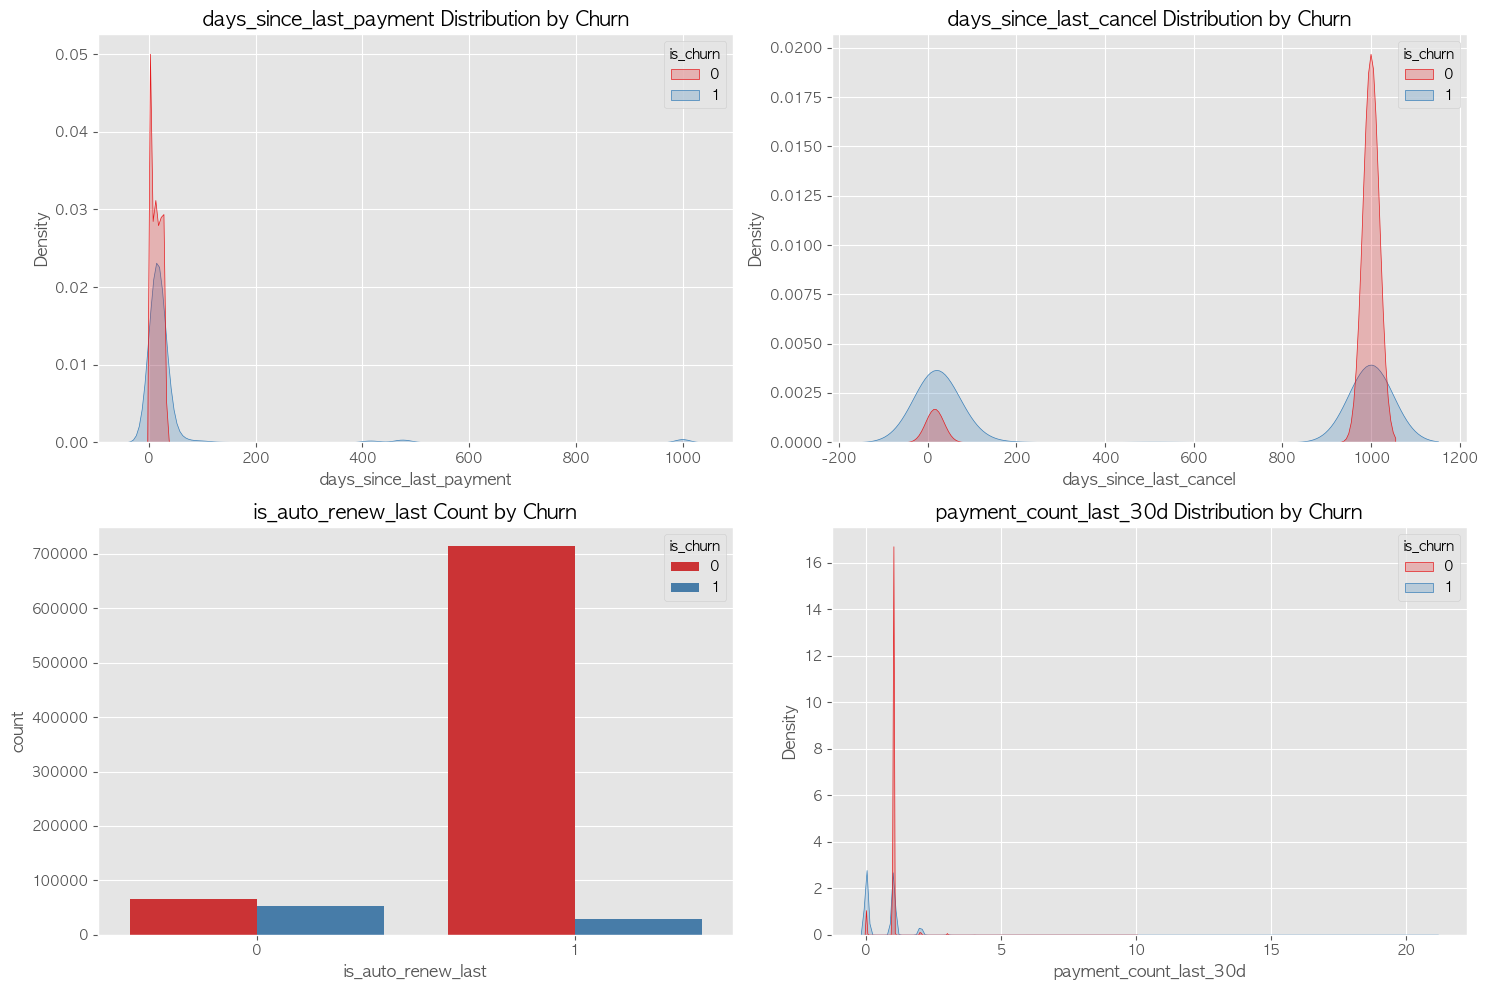

In [2]:
v4_cols = ['days_since_last_payment', 'days_since_last_cancel', 'is_auto_renew_last', 'payment_count_last_30d']
target = 'is_churn'

plt.figure(figsize=(15, 10))

for i, col in enumerate(v4_cols):
    if col not in df.columns:
        continue
        
    plt.subplot(2, 2, i+1)
    
    # KDE Plot for continuous, Countplot for categorical
    if df[col].nunique() > 10:
        sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, palette='Set1')
        plt.title(f'{col} Distribution by Churn')
    else:
        sns.countplot(data=df, x=col, hue=target, palette='Set1')
        plt.title(f'{col} Count by Churn')

plt.tight_layout()
plt.show()

### 💡 V4 분석 인사이트
- **days_since_last_payment**: 30일을 넘어서는 순간 이탈률이 급격히 치솟는 구간이 존재하는지 확인.
- **is_auto_renew_last**: 자동 갱신이 꺼져있는(0) 그룹의 이탈 비중이 압도적으로 높은지 확인.

## 2. V5.2: 행동 징후 변수 (Behavioral Signals)
**"건강검진 모델"**의 핵심인 행동 변화(추세) 변수들의 패턴을 분석합니다.

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_25612/659790046.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')
/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_25612/659790046.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')
/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_25612/659790046.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')
/var/folders/n6/9fr973913k7931ymsg4ly

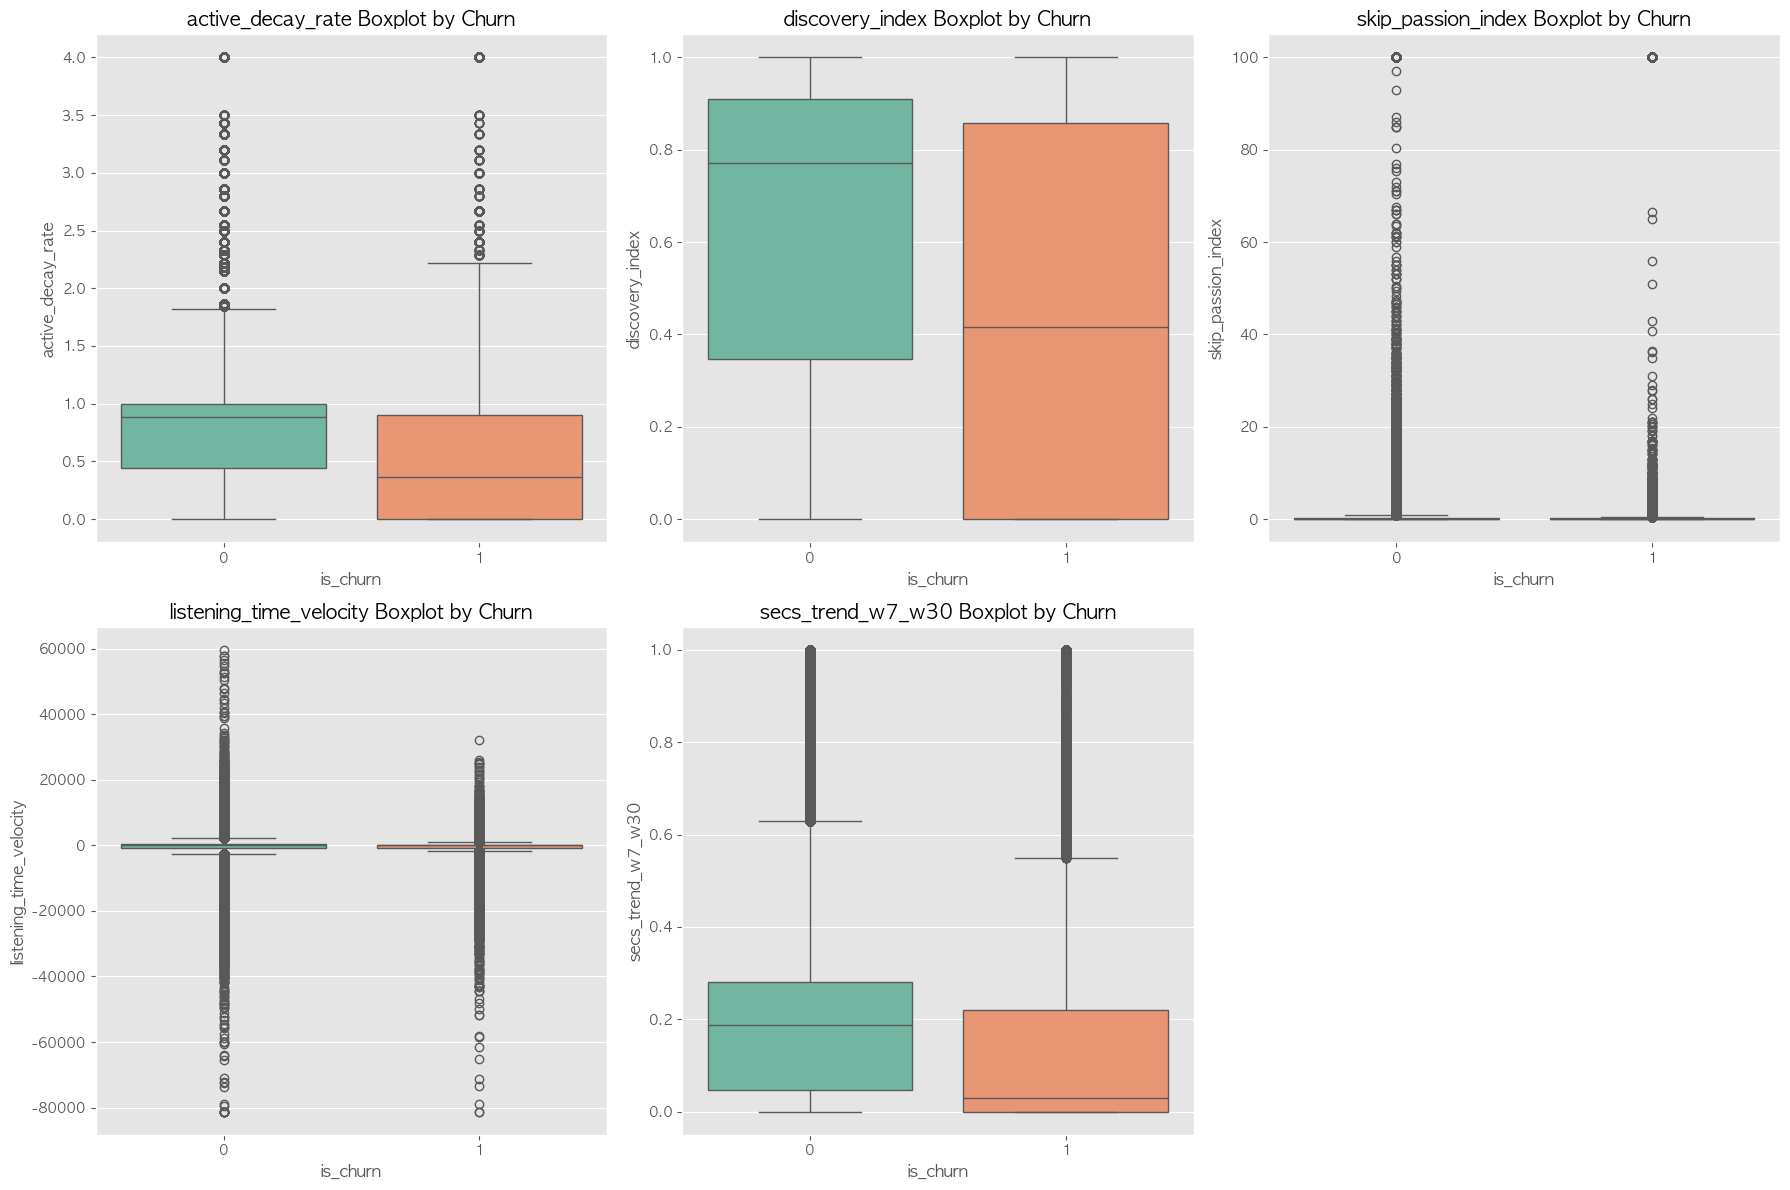

In [3]:
v5_cols = ['active_decay_rate', 'discovery_index', 'skip_passion_index', 'listening_time_velocity', 'secs_trend_w7_w30']

plt.figure(figsize=(18, 12))

for i, col in enumerate(v5_cols):
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
        
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=target, y=col, palette='Set2')
    plt.title(f'{col} Boxplot by Churn')

plt.tight_layout()
plt.show()

### 💡 V5.2 분석 인사이트
- **active_decay_rate**: 이탈자(1)의 값이 1.0보다 현저히 낮은지 (활동 급감) 확인.
- **skip_passion_index**: 이탈자가 일반 유저보다 스킵 성향이 높은지 확인.
- **secs_trend_w7_w30**: 이탈자가 장기 대비 단기 청취 시간이 줄어드는지 (음수 값) 확인.

## 3. 상관관계 분석 (Correlation Matrix)
핵심 파생 변수들 간의 상관관계와 이탈(is_churn)과의 직접적인 연관성을 봅니다.

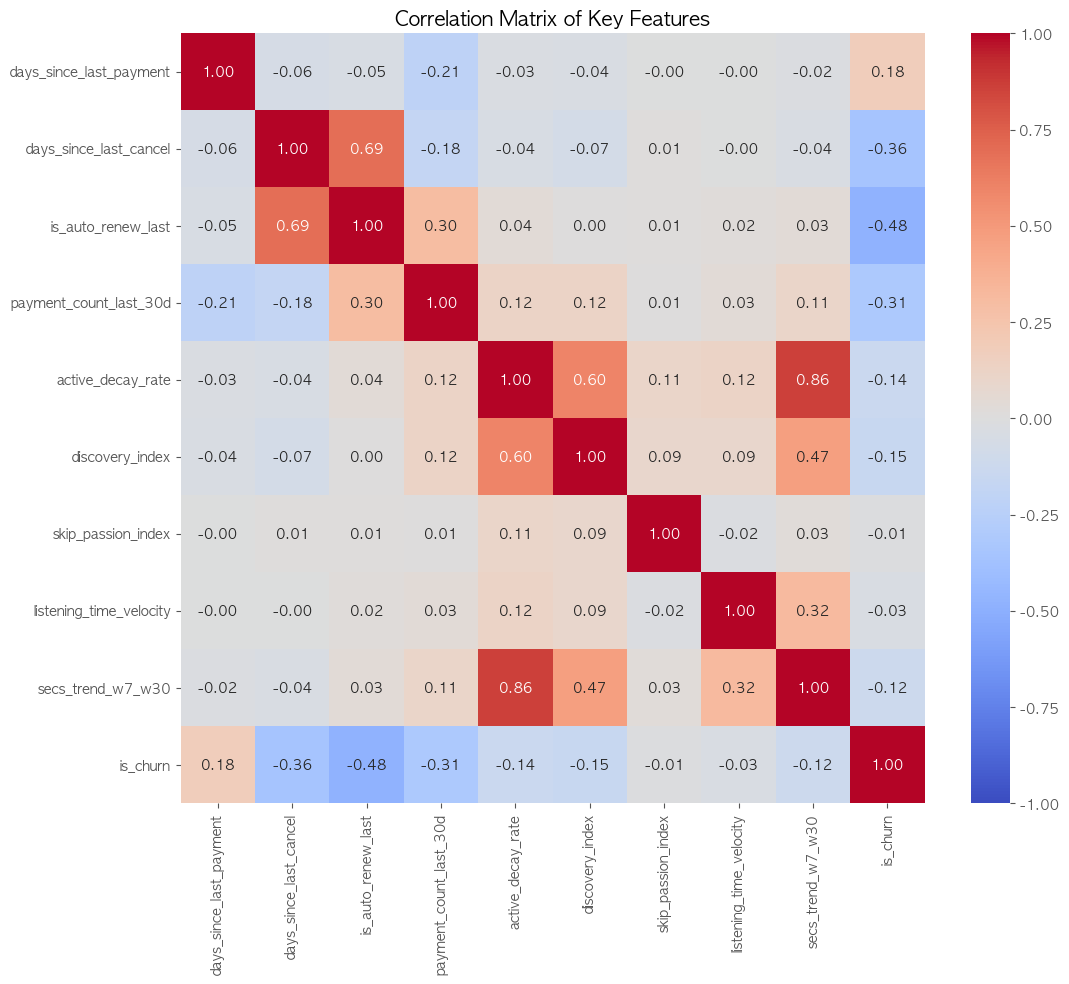

In [4]:
target_cols = v4_cols + v5_cols + ['is_churn']
target_cols = [c for c in target_cols if c in df.columns]

corr = df[target_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.show()

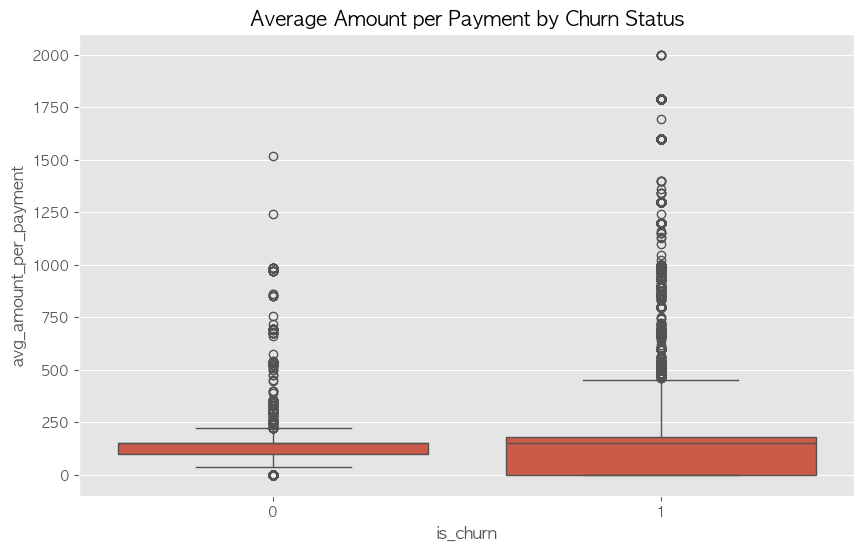

In [5]:
# Visualize relationship between avg_amount_per_payment and is_churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_churn', y='avg_amount_per_payment', data=df)
plt.title('Average Amount per Payment by Churn Status')
plt.show()

## 4. Detailed Feature Analysis (V4 & V5.2)
Visualizing key derived features for payment status and behavioral signals.

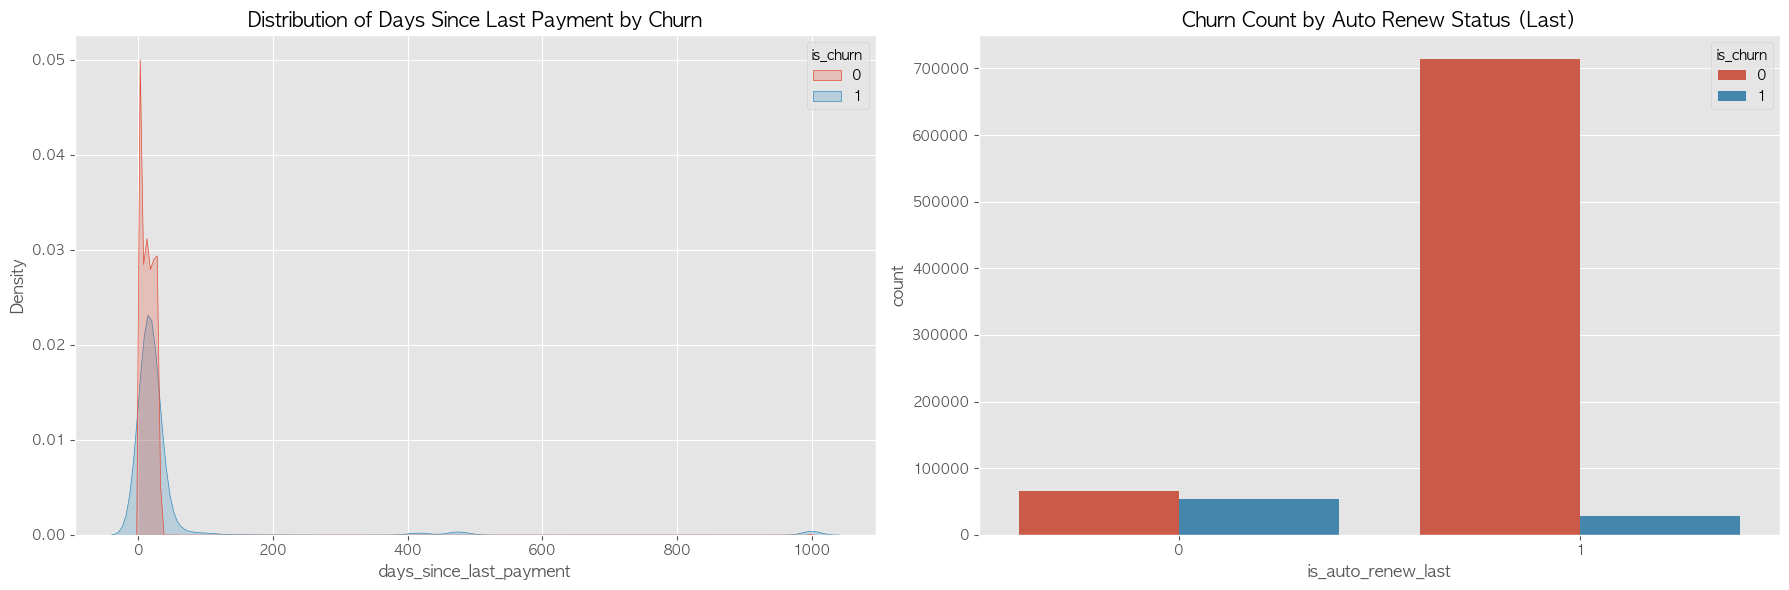

In [6]:
# V4 Visualization: Payment Status Features
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Days Since Last Payment (KDE Plot)
sns.kdeplot(data=df, x='days_since_last_payment', hue='is_churn', fill=True, common_norm=False, ax=axes[0])
axes[0].set_title('Distribution of Days Since Last Payment by Churn')

# 2. Auto Renew Last (Countplot with Ratio)
sns.countplot(data=df, x='is_auto_renew_last', hue='is_churn', ax=axes[1])
axes[1].set_title('Churn Count by Auto Renew Status (Last)')

plt.tight_layout()
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

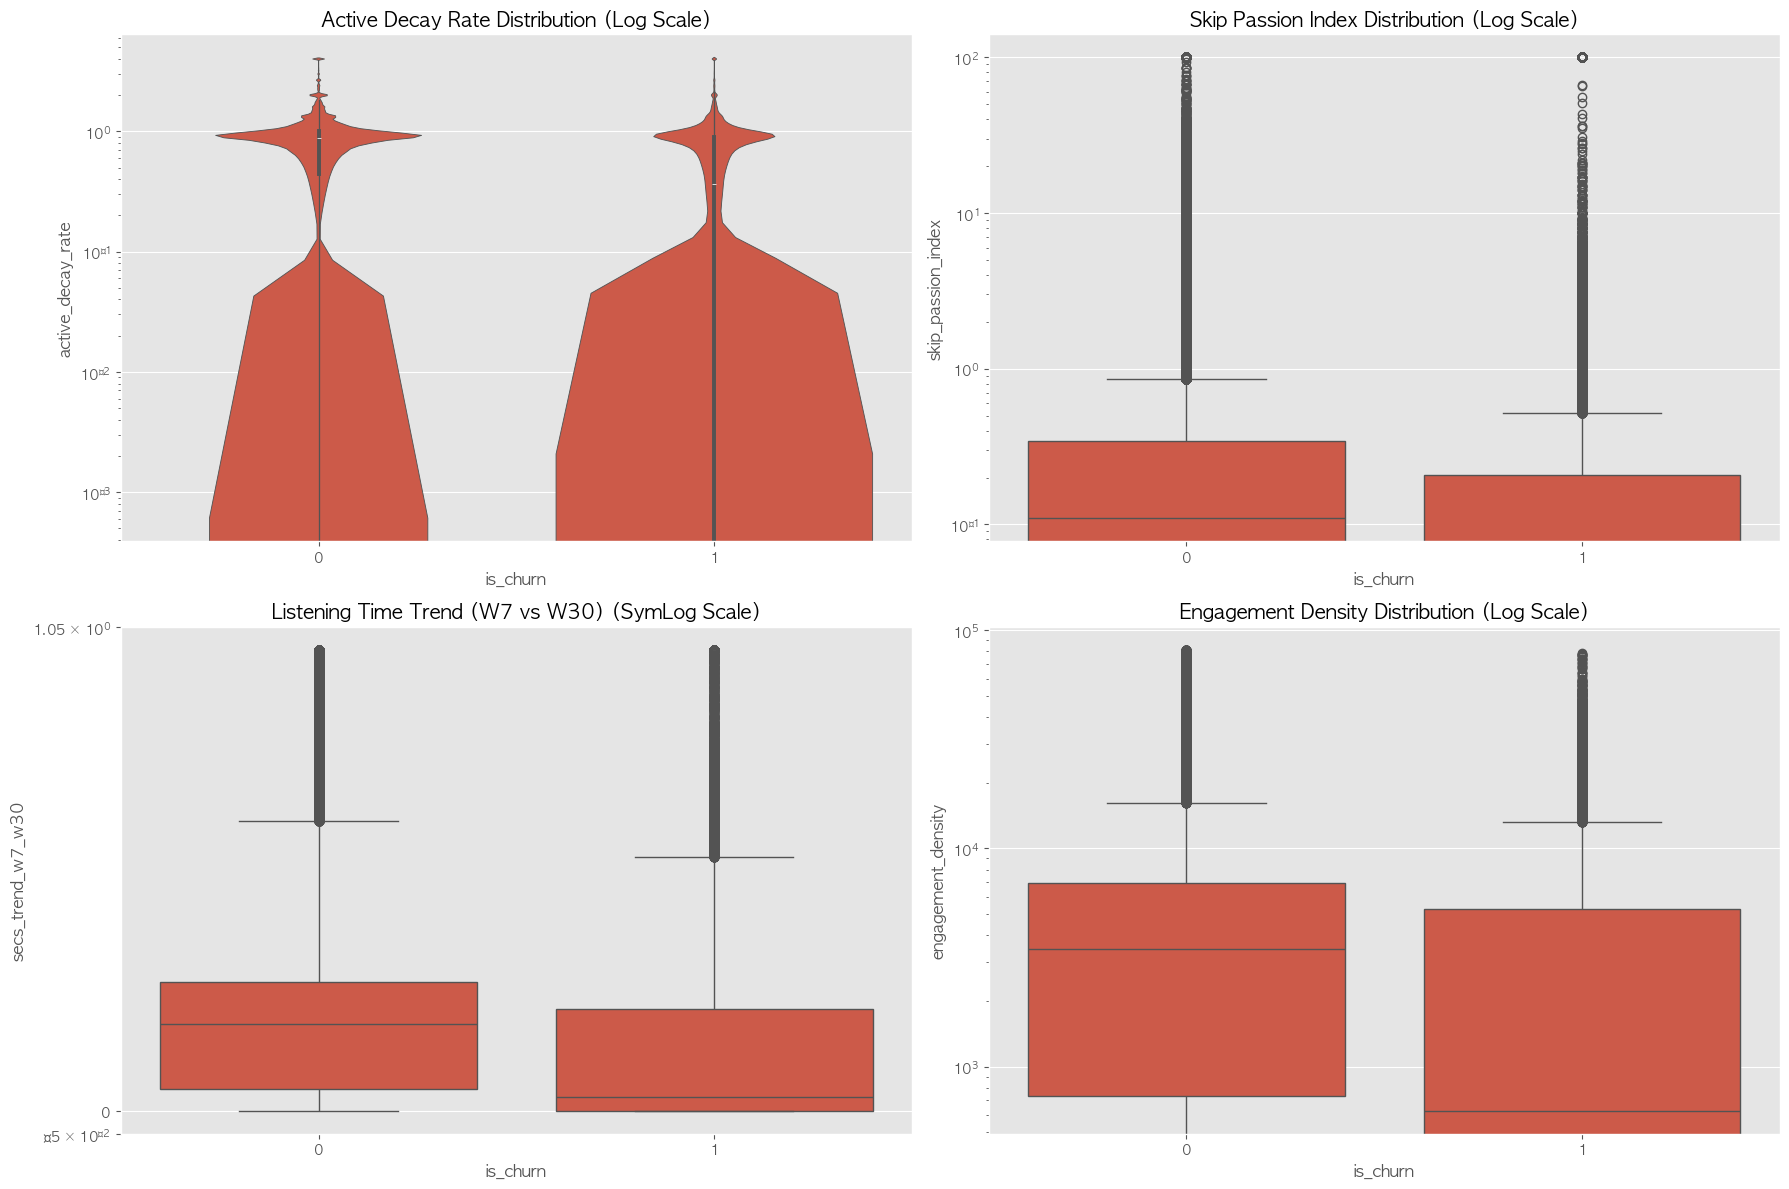

In [7]:
# V5.2 Visualization: Behavioral Signals (Log Scale)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Active Decay Rate
sns.violinplot(x='is_churn', y='active_decay_rate', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Active Decay Rate Distribution (Log Scale)')
axes[0, 0].set_yscale('log')

# 2. Skip Passion Index
sns.boxplot(x='is_churn', y='skip_passion_index', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Skip Passion Index Distribution (Log Scale)')
axes[0, 1].set_yscale('log')

# 3. Seconds Trend (W7 vs W30)
# Trend can be negative, so we use symlog (symmetrical log) or keep linear if problematic.
# Trying symlog here to handle mixed positive/negative values while compressing large magnitudes.
sns.boxplot(x='is_churn', y='secs_trend_w7_w30', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Listening Time Trend (W7 vs W30) (SymLog Scale)')
axes[1, 0].set_yscale('symlog')

# 4. Engagement Density
sns.boxplot(x='is_churn', y='engagement_density', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Engagement Density Distribution (Log Scale)')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


## 5. 이상치 처리 전략 (Outlier Handling Strategy)
행동 데이터(V5.2)의 왜도(Skewness)와 이상치(Outlier) 문제를 해결하기 위한 실험입니다.
Log 변환(np.log1p)과 Robust Scaling 등을 통해 데이터 분포를 정규화하고 모델 안정성을 높입니다.


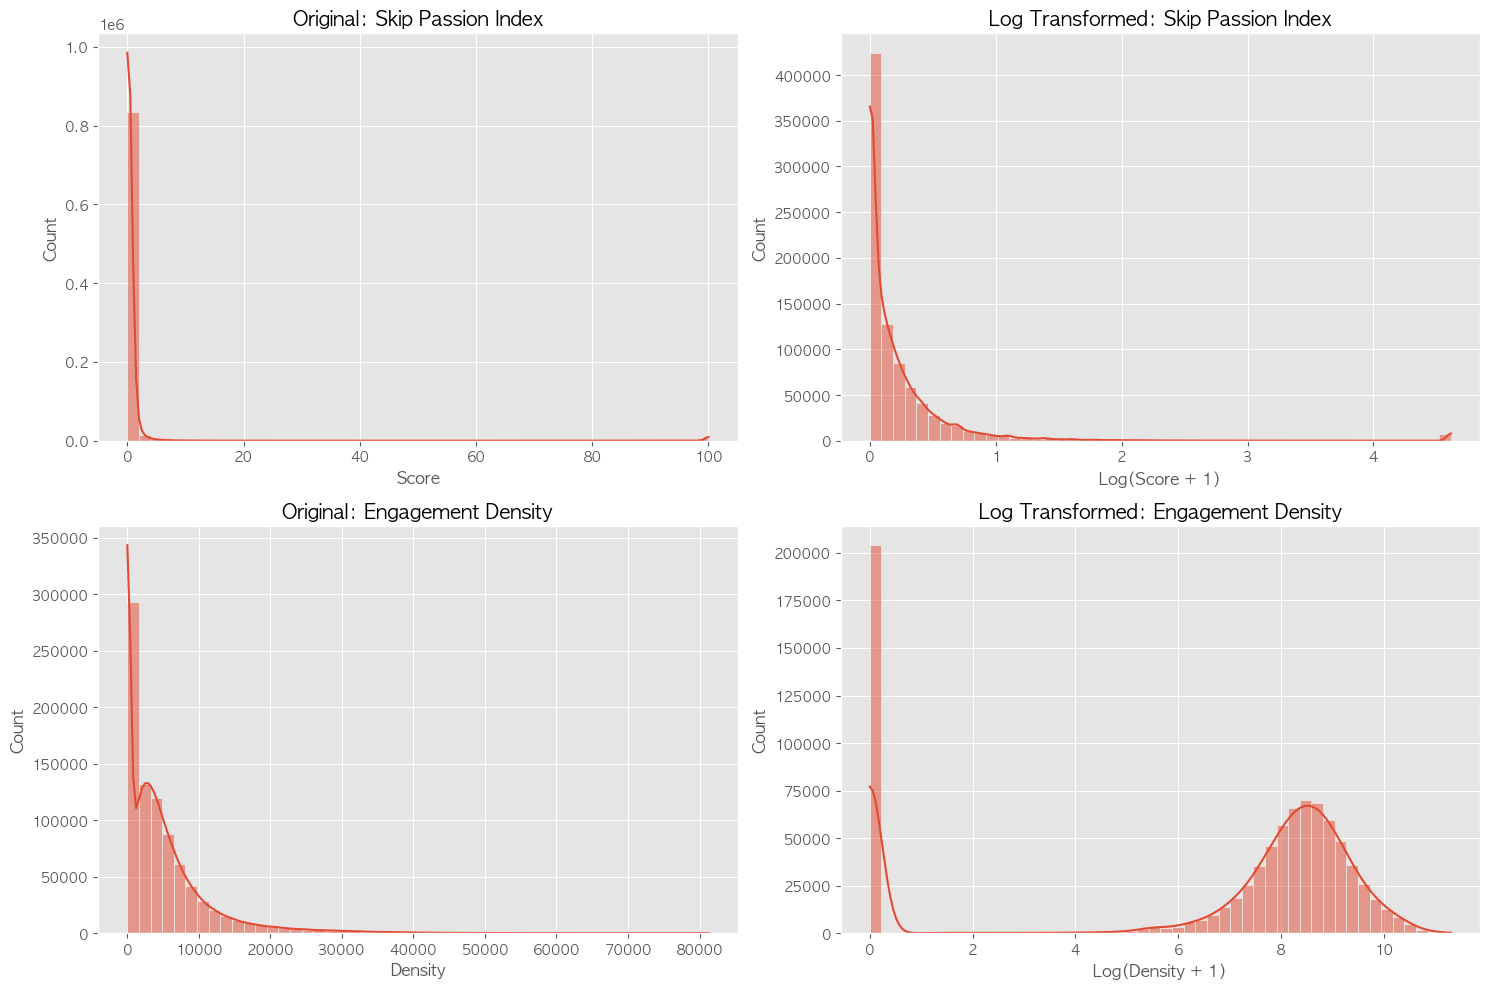

Original Skip Passion Skew: 10.63
Log Skip Passion Skew: 5.89
------------------------------
Original Engagement Skew: 2.99
Log Engagement Skew: -1.05


In [8]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Log Transformation for Skewed Features
# 'skip_passion_index'와 'engagement_density'는 매우 편향된 분포를 보일 가능성이 높음
df['log_skip_passion'] = np.log1p(df['skip_passion_index'])
df['log_engagement'] = np.log1p(df['engagement_density'])

# 2. Visualization: Raw vs Log-Transformed
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Skip Passion Index
sns.histplot(df['skip_passion_index'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original: Skip Passion Index')
axes[0, 0].set_xlabel('Score')

sns.histplot(df['log_skip_passion'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed: Skip Passion Index')
axes[0, 1].set_xlabel('Log(Score + 1)')

# Engagement Density
sns.histplot(df['engagement_density'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Original: Engagement Density')
axes[1, 0].set_xlabel('Density')

sns.histplot(df['log_engagement'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log Transformed: Engagement Density')
axes[1, 1].set_xlabel('Log(Density + 1)')

plt.tight_layout()
plt.show()

# 3. Check Skewness
print(f"Original Skip Passion Skew: {df['skip_passion_index'].skew():.2f}")
print(f"Log Skip Passion Skew: {df['log_skip_passion'].skew():.2f}")
print("-" * 30)
print(f"Original Engagement Skew: {df['engagement_density'].skew():.2f}")
print(f"Log Engagement Skew: {df['log_engagement'].skew():.2f}")



### 💡 이상치 처리 인사이트
- **Log 변환 효과**: 원본 데이터 대비 왜도(Skewness)가 얼마나 개선되었는지 확인합니다.
- **분포 변화**: Log 변환 후 분포가 정규분포에 더 가까워졌다면, 선형 모델이나 거리 기반 알고리즘(GNN, KNN 등) 학습에 유리합니다.
- **결정**: 트리 기반 모델(XGBoost, LightGBM)은 스케일링에 덜 민감하지만, 극단적인 이상치는 트리의 분기 효율을 떨어뜨릴 수 있으므로 변환된 피처를 사용하는 것이 안전할 수 있습니다.



### 💡 추가 실험: Winsorization (윈저라이징)
Log 변환 후에도 여전히 이상치가 남아있거나 왜도(Skewness)가 높은 경우, **극단적인 값(상위 1% 또는 5%)을 임계값으로 대체(Clipping)** 하여 이상치의 영향력을 제한합니다.


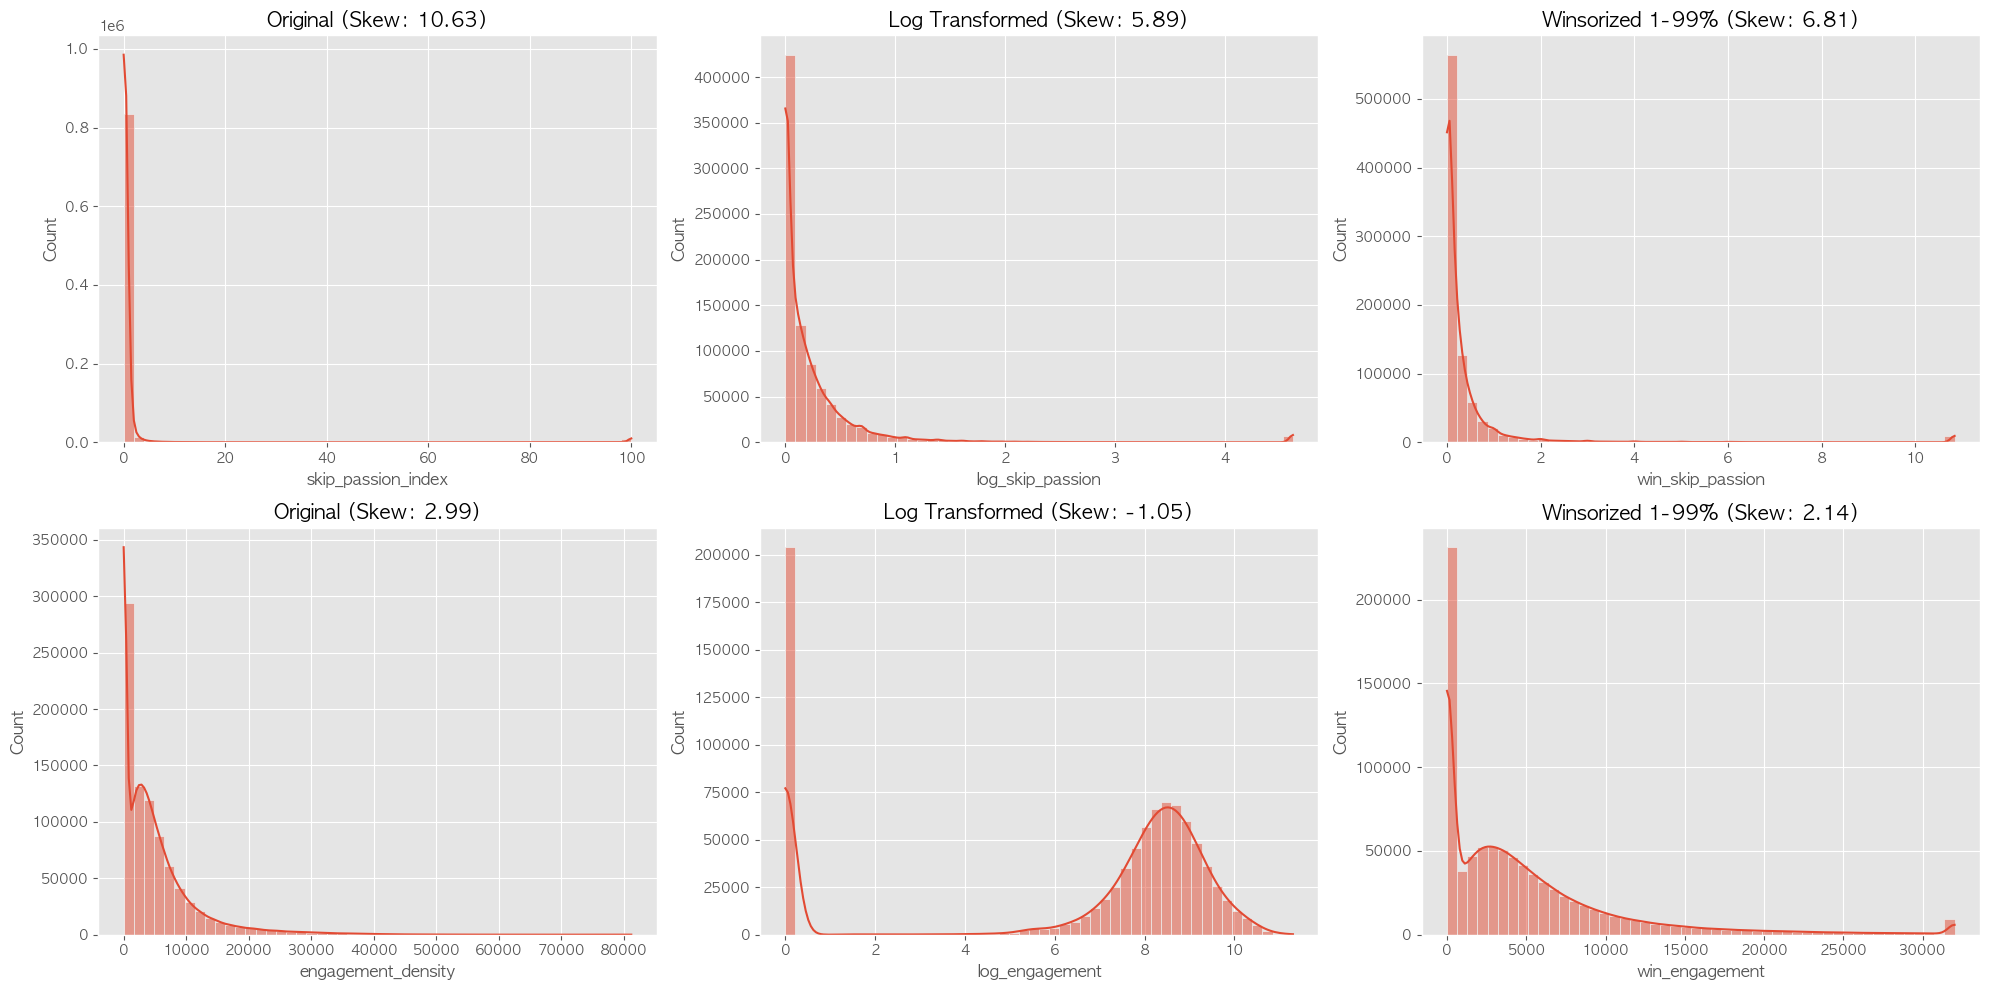

Skip Passion 99th Percentile: 10.8378
Engagement 99th Percentile: 32021.2529


In [9]:

# 1. Winsorization (Clipping at 1st and 99th percentiles)
# 상하위 1% 지점을 임계값으로 보정
p01_skip = df['skip_passion_index'].quantile(0.01)
p99_skip = df['skip_passion_index'].quantile(0.99)
df['win_skip_passion'] = df['skip_passion_index'].clip(lower=p01_skip, upper=p99_skip)

p01_eng = df['engagement_density'].quantile(0.01)
p99_eng = df['engagement_density'].quantile(0.99)
df['win_engagement'] = df['engagement_density'].clip(lower=p01_eng, upper=p99_eng)

# 2. Visualization: Raw vs Log vs Winsorized
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Skip Passion Index Comparisons
sns.histplot(df['skip_passion_index'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original (Skew: {df["skip_passion_index"].skew():.2f})')

sns.histplot(df['log_skip_passion'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skew: {df["log_skip_passion"].skew():.2f})')

sns.histplot(df['win_skip_passion'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Winsorized 1-99% (Skew: {df["win_skip_passion"].skew():.2f})')

# Engagement Density Comparisons
sns.histplot(df['engagement_density'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Original (Skew: {df["engagement_density"].skew():.2f})')

sns.histplot(df['log_engagement'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Log Transformed (Skew: {df["log_engagement"].skew():.2f})')

sns.histplot(df['win_engagement'], bins=50, kde=True, ax=axes[1, 2])
axes[1, 2].set_title(f'Winsorized 1-99% (Skew: {df["win_engagement"].skew():.2f})')

plt.tight_layout()
plt.show()

# Print Percentiles
print(f"Skip Passion 99th Percentile: {p99_skip:.4f}")
print(f"Engagement 99th Percentile: {p99_eng:.4f}")



### 💡 분석 결론 (Outlier Strategy)
- **Skip Passion Index**: Log 변환과 Winsorization 중 어느 것이 분포를 더 정규분포에 가깝게 만드는지 확인하세요. 왜도(Skewness)가 0에 가까울수록 좋습니다.
- **Engagement Density**: Log 변환 시 왜도가 음수(-1.05)로 변했다면, Winsorization이 더 안정적인 선택일 수 있습니다.


### 📊 Outlier Strategy Performance Test
**Goal**: Compare the predictive power of "Raw", "Log-Transformed", and "Winsorized" features using a baseline model.
**Metric**: **F1-Score** (5-fold Cross-Validation)

We will use a Logistic Regression model with `class_weight='balanced'` to better handle churn prediction.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Define features for each strategy
features_raw = ['active_decay_rate', 'skip_passion_index', 'secs_trend_w7_w30', 'engagement_density']
features_log = ['active_decay_rate', 'log_skip_passion', 'secs_trend_w7_w30', 'log_engagement']
features_win = ['active_decay_rate', 'win_skip_passion', 'secs_trend_w7_w30', 'win_engagement']

strategies = {
    'Raw': features_raw,
    'Log-Transformed': features_log,
    'Winsorized': features_win
}

# Target
y = df['is_churn']

# Run Comparison
results = {}
for name, feats in strategies.items():
    # Prepare X
    X = df[feats].copy()
    
    # Pipeline: Impute -> Scale -> LogReg (Balanced)
    model = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler(),
        LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    )
    
    # 5-fold CV F1-Score
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    results[name] = scores.mean()
    print(f"{name} F1-Score: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Best Strategy
best_strategy = max(results, key=results.get)
print("-" * 30)
print(f"🏆 Best Outlier Strategy: {best_strategy} (F1-Score: {results[best_strategy]:.4f})")

Raw F1-Score: 0.2460 (+/- 0.0015)
Log-Transformed F1-Score: 0.2695 (+/- 0.0016)
Winsorized F1-Score: 0.2467 (+/- 0.0016)
------------------------------
🏆 Best Outlier Strategy: Log-Transformed (F1-Score: 0.2695)


### 📉 V5.2 Relative Deviation Analysis (Standardized)
**Goal**: Visualize how much the Churn group (Risk Group) deviates from the global average.
**Method**:
1. Standardize features (Z-score scaling) -> Mean = 0, Std = 1.
2. Calculate the mean Z-score for Churners (1) vs Non-Churners (0).
3. Confirm if Churners show a distinct "Deviation Pattern".

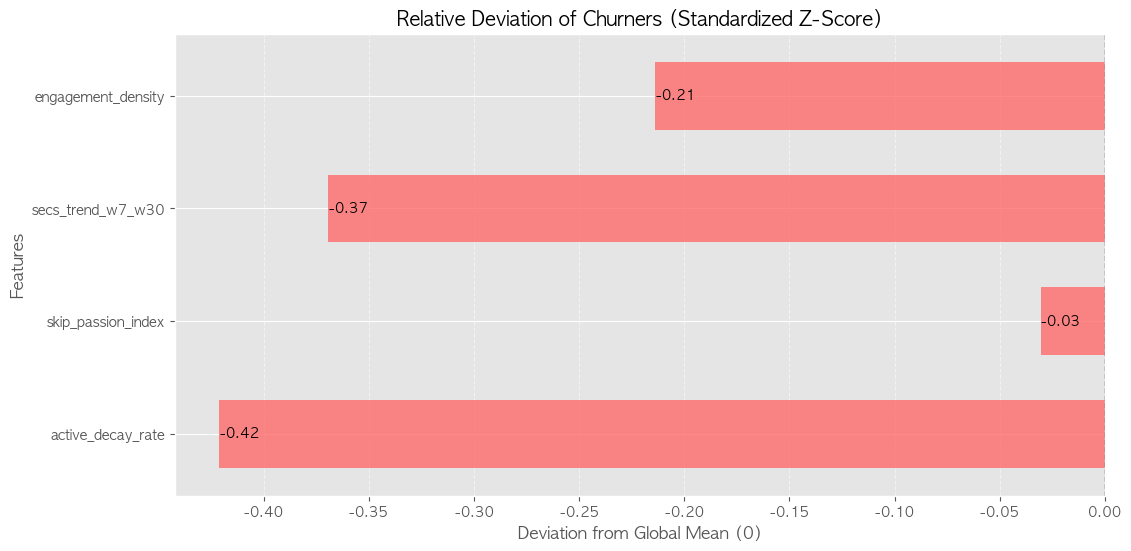

Standardized Mean Deviation by Group:
                    Non-Churn (0)  Churn (1)
active_decay_rate        0.044006  -0.421171
skip_passion_index       0.003179  -0.030423
secs_trend_w7_w30        0.038583  -0.369268
engagement_density       0.022340  -0.213809


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# V5.2 Features
v5_2_features = ['active_decay_rate', 'skip_passion_index', 'secs_trend_w7_w30', 'engagement_density']

# 1. Standardize (Z-score)
scaler = StandardScaler()
df_scaled = df[v5_2_features].copy()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=v5_2_features)
df_scaled['is_churn'] = df['is_churn']

# 2. Calculate Group Means (Deviation from 0)
group_means = df_scaled.groupby('is_churn').mean().T
group_means.columns = ['Non-Churn (0)', 'Churn (1)']

# 3. Visualization (Diverging Bars)
plt.figure(figsize=(12, 6))
group_means['Churn (1)'].plot(kind='barh', color='#FF6B6B', alpha=0.8, width=0.6)
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title('Relative Deviation of Churners (Standardized Z-Score)', fontsize=14)
plt.xlabel('Deviation from Global Mean (0)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate values
for index, value in enumerate(group_means['Churn (1)']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, color='black' if abs(value) < 1 else 'white')

plt.show()

# Print actual values for validation
print("Standardized Mean Deviation by Group:")
print(group_means)

active_decay_rate (-0.42): 이탈자들은 일반 유저보다 최근 일주일간의 활동량이 평균 대비 매우 크게 감소했습니다. 이 값이 가장 낮은 음수라는 것은 이탈을 예측하는 가장 강력한 '신호'라는 뜻입니다.

secs_trend_w7_w30 (-0.37): 이탈자들은 한 달 평균 청취 시간에 비해 최근 일주일 청취 시간이 눈에 띄게 줄어들었습니다.

engagement_density (-0.21): 앱에 접속했을 때 머무는 시간이나 활동의 밀도 역시 일반인보다 낮습니다.

skip_passion_index (-0.03): 이 지표는 0에 매우 가깝습니다. 즉, 노래를 중간에 넘기는 행동(Skip)은 이탈자나 일반인이나 비슷한 수준임을 의미합니다. 이탈을 판단하는 데 있어 스킵 횟수 자체는 결정적인 단서가 아닐 수 있다는 해석이 가능합니다.